In [210]:
import prospect as ssim

import geopandas as gpd
from scipy.stats._distn_infrastructure import rv_frozen

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Build `Area`

### From shapefile

In [211]:
area = ssim.Area.from_shapefile('test_area', '../tests/test_datasets/shapefiles/areas/leiap_field1.shp')

{'name': 'test_area',
 'vis': 1.0,
 'vis_type': 'scalar',
 'shape': <shapely.geometry.polygon.Polygon at 0x1a1e6d6080>,
 'df':    area_name  vis                                           geometry
 0  test_area  1.0  POLYGON ((533545.664 4388841.881, 533546.214 4...}

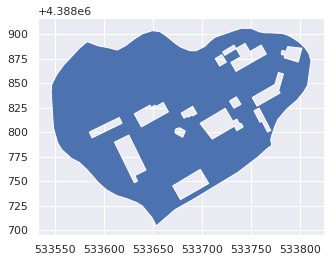

In [212]:
area.df.plot();
area.__dict__

### Set visibility to beta distribution

In [213]:
area.set_vis_beta_dist(alpha=9, beta=1)

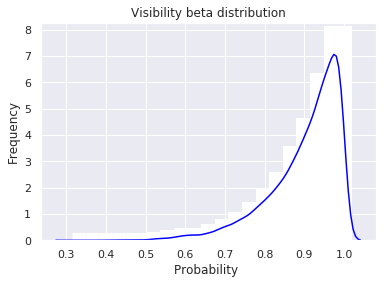

In [214]:
ax = sns.distplot(area.vis.rvs(10000),
                  bins=20,
                  kde=True,
                  hist_kws={"linewidth": 15,'alpha':1},
                  kde_kws={'color':'blue'}
                 )
ax.set(title='Visibility beta distribution', xlabel='Probability ', ylabel='Frequency');

In [215]:
area.df

,area_name,vis,geometry
0,test_area,<scipy.stats._distn_infrastructure.rv_frozen o...,"POLYGON ((533545.664 4388841.881, 533546.214 4..."


## Build `Layers`

### Poisson point process

In [216]:
ceramics = ssim.Layer.from_poisson_points(rate=.001, area=area, name='ceramics')

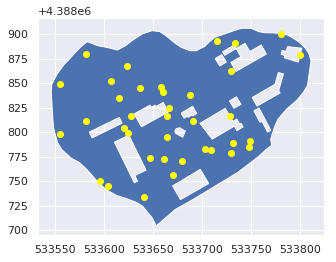

In [217]:
ceramics.df.plot(ax=area.df.plot(), color='yellow');

#### Update ideal observation rate of `ceramics`

In [218]:
ceramics.set_ideal_obs_rate_beta_dist(alpha=9.5, beta=0.5)

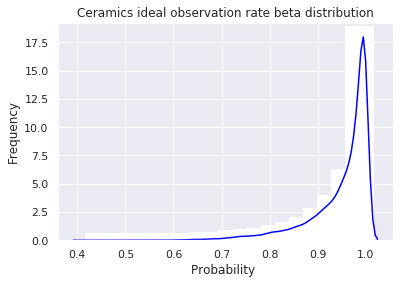

In [219]:
ax = sns.distplot(ceramics.ideal_obs_rate.rvs(10000),
                  bins=20,
                  kde=True,
                  hist_kws={"linewidth": 15,'alpha':1},
                  kde_kws={'color':'blue'}
                 )
ax.set(title='Ceramics ideal observation rate beta distribution', xlabel='Probability ', ylabel='Frequency');

#### Update time penalty of `ceramics`

When a ceramic artifact is collected, how much time does that add (in seconds) to the collection time? Here we imagine that the mean time added by one artifact is 60 seconds, but that the standard deviation is also 60 seconds. The minimum time that must be added is 10 seconds and the maximum is 600 seconds.

In [220]:
ceramics.set_time_penalty_truncnorm_dist(mean=60, sd=60, lower=10, upper=600)

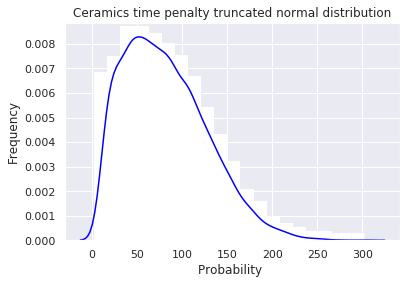

In [221]:
ax = sns.distplot(ceramics.time_penalty.rvs(10000),
                  bins=20,
                  kde=True,
                  hist_kws={"linewidth": 15,'alpha':1},
                  kde_kws={'color':'blue'}
                 )
ax.set(title='Ceramics time penalty truncated normal distribution', xlabel='Probability ', ylabel='Frequency');

In [222]:
ceramics.df.head()

,layer_name,fid,time_penalty,ideal_obs_rate,geometry
1,ceramics,ceramics_1,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,POINT (533660.7973253919 4388772.7480053)
4,ceramics,ceramics_4,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,POINT (533780.8348330409 4388899.772526377)
7,ceramics,ceramics_7,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,POINT (533748.5941406331 4388790.878750403)
8,ceramics,ceramics_8,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,POINT (533581.6587812086 4388879.68485653)
11,ceramics,ceramics_11,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,POINT (533664.1199638124 4388816.323457745)


### Thomas point process

In [223]:
lithics = ssim.Layer.from_thomas_points(
    parent_rate=0.001, child_rate=5, gauss_var=5, area=area, name='lithics')

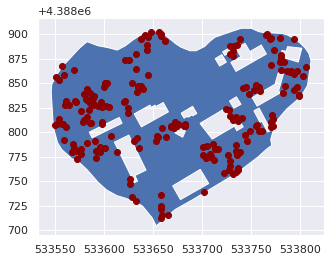

In [224]:
lithics.df.plot(ax=area.df.plot(), color='darkred');

#### Update time penalty 
...but do not update ideal observation rate. This would presume that lithic artifacts are easy to see.

In [225]:
lithics.set_time_penalty_truncnorm_dist(mean=20, sd=5, lower=5, upper=40)

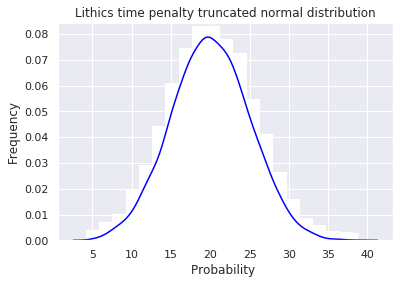

In [226]:
ax = sns.distplot(lithics.time_penalty.rvs(10000),
                  bins=20,
                  kde=True,
                  hist_kws={"linewidth": 15,'alpha':1},
                  kde_kws={'color':'blue'}
                 )
ax.set(
    title='Lithics time penalty truncated normal distribution', 
    xlabel='Probability ', ylabel='Frequency');

In [227]:
lithics.df.head()

,layer_name,fid,time_penalty,ideal_obs_rate,geometry
0,lithics,lithics_0,<scipy.stats._distn_infrastructure.rv_frozen o...,1.0,POINT (533662.3982911131 4388892.72107808)
1,lithics,lithics_1,<scipy.stats._distn_infrastructure.rv_frozen o...,1.0,POINT (533658.3328813682 4388898.193278046)
2,lithics,lithics_2,<scipy.stats._distn_infrastructure.rv_frozen o...,1.0,POINT (533656.2183716656 4388901.751325829)
3,lithics,lithics_3,<scipy.stats._distn_infrastructure.rv_frozen o...,1.0,POINT (533774.041894134 4388883.730446415)
4,lithics,lithics_4,<scipy.stats._distn_infrastructure.rv_frozen o...,1.0,POINT (533626.8196158188 4388747.30735534)


### Matern point process
Set time penalty as a scalar (8 seconds) during creation

In [228]:
ground_stone = ssim.Layer.from_matern_points(
    parent_rate=0.001, child_rate=5, radius=15, 
    area=area, name='ground stone', time_penalty=8
)

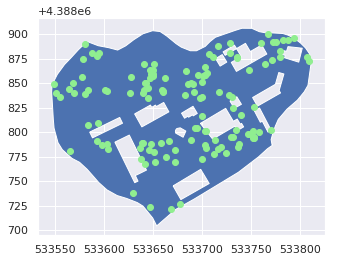

In [229]:
ground_stone.df.plot(ax=area.df.plot(), color='lightgreen');

#### Update ideal observation rate

In [230]:
ground_stone.set_ideal_obs_rate_beta_dist(alpha=9.9, beta=0.1)

In [231]:
ground_stone.df.head()

,layer_name,fid,time_penalty,ideal_obs_rate,geometry
0,ground stone,ground stone_0,8,<scipy.stats._distn_infrastructure.rv_frozen o...,POINT (533711.5950798948 4388778.066689476)
1,ground stone,ground stone_1,8,<scipy.stats._distn_infrastructure.rv_frozen o...,POINT (533702.5143759757 4388787.035198987)
2,ground stone,ground stone_2,8,<scipy.stats._distn_infrastructure.rv_frozen o...,POINT (533715.6001877292 4388782.883453061)
3,ground stone,ground stone_3,8,<scipy.stats._distn_infrastructure.rv_frozen o...,POINT (533699.7816383643 4388772.392074107)
4,ground stone,ground stone_4,8,<scipy.stats._distn_infrastructure.rv_frozen o...,POINT (533704.2221281915 4388783.513795437)


### Points from a shapefile

In [232]:
coins = ssim.Layer.from_shapefile(path='../tests/test_datasets/shapefiles/layers/leiap_field1_points.shp', 
                                 area=area, name='coins', feature_type='points')

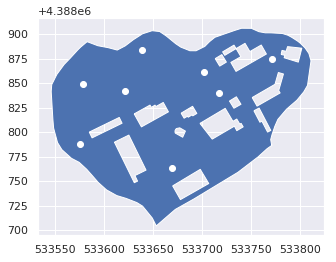

In [233]:
coins.df.plot(ax=area.df.plot(), color='white');

### Pseudorandom point process

In [234]:
tile = ssim.Layer.from_pseudorandom_points(n=15, area=area, name='tile')

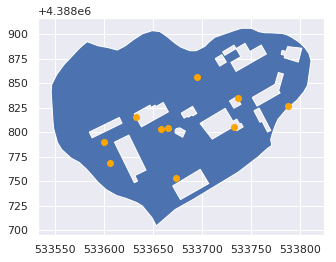

In [235]:
tile.df.plot(ax=area.df.plot(), color='orange');

### Plot all `Layer` objects

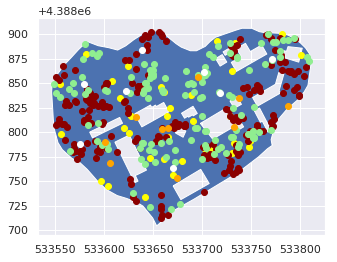

In [236]:
area_ax = area.df.plot()
ceramics.df.plot(ax=area_ax, color='yellow')
lithics.df.plot(ax=area_ax, color='darkred')
ground_stone.df.plot(ax=area_ax, color='lightgreen')
coins.df.plot(ax=area_ax, color='white')
tile.df.plot(ax=area_ax, color='orange');

## Compile `Layers` into `Assemblage`

In [237]:
assemblage = ssim.Assemblage(
    name='test_assemblage', 
    layers=[ceramics, lithics, ground_stone, coins, tile]
)

In [238]:
assemblage.df.head()

,layer_name,fid,time_penalty,ideal_obs_rate,geometry
0,ceramics,ceramics_1,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,POINT (533660.7973253919 4388772.7480053)
1,ceramics,ceramics_4,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,POINT (533780.8348330409 4388899.772526377)
2,ceramics,ceramics_7,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,POINT (533748.5941406331 4388790.878750403)
3,ceramics,ceramics_8,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,POINT (533581.6587812086 4388879.68485653)
4,ceramics,ceramics_11,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,POINT (533664.1199638124 4388816.323457745)


In [239]:
assemblage.df.shape

(385, 5)

In [240]:
assemblage.df['layer_name'].unique()

array(['ceramics', 'lithics', 'ground stone', 'coins', 'tile'],
      dtype=object)

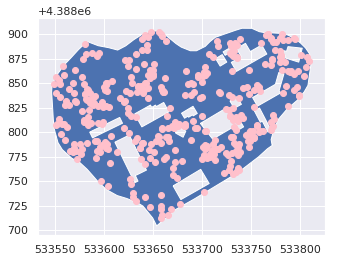

In [241]:
assemblage.df.plot(ax=area.df.plot(), color='pink');

## Build `Coverage`

In [242]:
transects = ssim.Coverage.make_transects(
    area=area, name='transects', spacing=10, sweep_width=2, 
    optimize_orient_by='area_orient', orient_axis='short',
    min_time_per_unit=0.5
)

In [243]:
transects.df.head()

,su_id,area,base_search_time,length,sweep_width,geometry
0,0,210.762955,30.561201,61.122401,2,(POLYGON ((533610.4675938938 4388739.095688822...
1,1,543.933425,70.069494,140.138988,2,(POLYGON ((533658.1146908473 4388709.590210016...
2,2,632.167765,79.077333,158.154667,2,"POLYGON ((533665.7293123626 4388716.188949207,..."
3,3,593.165096,74.291707,148.583414,2,(POLYGON ((533673.3662457999 4388722.767565872...
4,4,531.385725,65.915086,131.830173,2,(POLYGON ((533682.4879979118 4388728.007064321...


In [244]:
transects.n_survey_units

25

In [245]:
transects.spacing

10

In [246]:
transects.survey_unit_type

'transect'

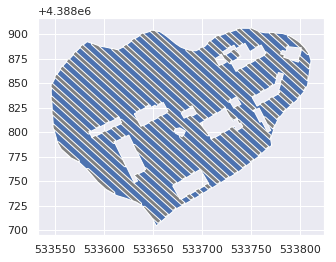

In [247]:
transects.df.plot(ax=area.df.plot(), color='gray');

In [248]:
transects.orientation

47.95354531912556

## Build `Team`

### Create `Surveyor` objects

First, add a "perfect" surveyor, who we'll call an expert

In [249]:
pi = ssim.Surveyor(name='Vivienne', surveyor_type='PI', skill=1.0, speed_penalty=0)

In [250]:
pi.df

,surveyor_name,surveyor_type,skill,speed_penalty
0,Vivienne,PI,1.0,0


In [251]:
grad1 = ssim.Surveyor(name='Dennis', surveyor_type='grad_student')
grad1.df

,surveyor_name,surveyor_type,skill,speed_penalty
0,Dennis,grad_student,1.0,0.0


Reduce the skill level just slightly for the grad student. Leave the `speed_penalty` at 0 because this student has a lot of experience with this methodology.

In [252]:
grad1.set_skill_beta_dist(alpha=9.5, beta=0.5)
grad1.df

,surveyor_name,surveyor_type,skill,speed_penalty
0,Dennis,grad_student,<scipy.stats._distn_infrastructure.rv_frozen o...,0.0


In [253]:
grad2 = ssim.Surveyor(name='Alex', surveyor_type='grad_student')
grad2.set_skill_beta_dist(alpha=9.5, beta=0.5)

Add a `speed_penalty` to this grad student who is unfamiliar with the methodology. Mean penalty is 60 seconds, with a wide standard deviation. Penalty cannot go below zero or above 300 seconds (5 minutes)

In [254]:
grad2.set_speed_penalty_truncnorm_dist(mean=60, sd=100, lower=0, upper=300)

The distribution of `speed_penalty` values for grad2 would look something like this.

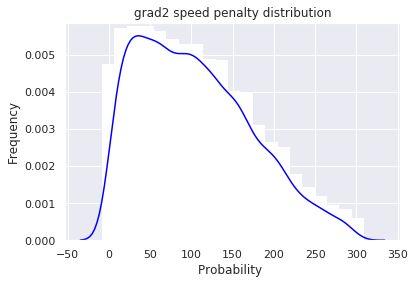

In [255]:
ax = sns.distplot(grad2.speed_penalty.rvs(10000),
                  bins=20,
                  kde=True,
                  hist_kws={"linewidth": 15,'alpha':1},
                  kde_kws={'color':'blue'}
                 )
ax.set(title='grad2 speed penalty distribution', xlabel='Probability ', ylabel='Frequency');

In [256]:
undergrad1 = ssim.Surveyor(name='Robert', surveyor_type='undergrad')
undergrad1.set_skill_beta_dist(alpha=8, beta=2)
undergrad1.set_speed_penalty_truncnorm_dist(mean=90, sd=100, lower=0, upper=300)

In [257]:
undergrad2 = ssim.Surveyor(name='Faye', surveyor_type='undergrad')
undergrad2.set_skill_beta_dist(alpha=6.5, beta=3.5)
undergrad2.set_speed_penalty_truncnorm_dist(mean=110, sd=100, lower=0, upper=400)

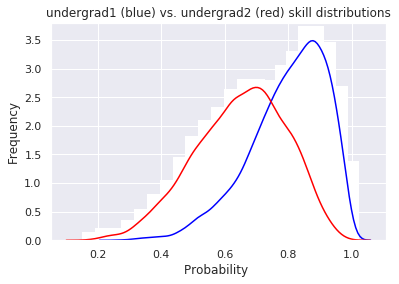

In [258]:
ax = sns.distplot(undergrad1.skill.rvs(10000),
                  bins=20,
                  kde=True,
                  hist_kws={"linewidth": 15,'alpha':1},
                  kde_kws={'color':'blue'}
                 )

sns.distplot(undergrad2.skill.rvs(10000),
                  bins=20,
                  kde=True,
                  hist_kws={"linewidth": 15,'alpha':1},
                  kde_kws={'color':'red'}
                 )
ax.set(title='undergrad1 (blue) vs. undergrad2 (red) skill distributions', xlabel='Probability ', ylabel='Frequency');

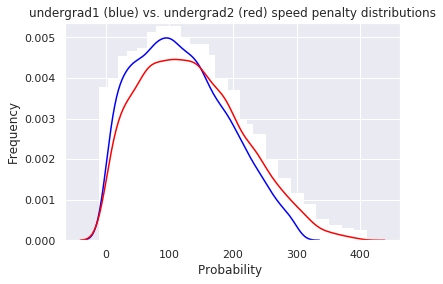

In [259]:
ax = sns.distplot(undergrad1.speed_penalty.rvs(10000),
                  bins=20,
                  kde=True,
                  hist_kws={"linewidth": 15,'alpha':1},
                  kde_kws={'color':'blue'}
                 )

sns.distplot(undergrad2.speed_penalty.rvs(10000),
                  bins=20,
                  kde=True,
                  hist_kws={"linewidth": 15,'alpha':1},
                  kde_kws={'color':'red'}
                 )
ax.set(title='undergrad1 (blue) vs. undergrad2 (red) speed penalty distributions', xlabel='Probability ', ylabel='Frequency');

In [260]:
team = ssim.Team(name='invincibles', surveyors=[pi, grad1, grad2, undergrad1, undergrad2])

In [261]:
team.df

,surveyor_name,surveyor_type,skill,speed_penalty
0,Vivienne,PI,1,0
1,Dennis,grad_student,<scipy.stats._distn_infrastructure.rv_frozen o...,0
2,Alex,grad_student,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...
3,Robert,undergrad,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...
4,Faye,undergrad,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...


## One run of the `Simulation`

### Notes on compiling outputs

# `assemblage_out`

For each artifact or feature, record:
- Did it intersect a survey unit? `True` or `False`
- What was the `su_id` of the survey unit?
- ~~Who was the surveyor for that survey unit?~~
- What was the visibility value (inherited scalar or value from distribution/raster)?
- What was the ideal observation rate (inherited scalar or value from distribution)?
- What was the surveyor skill (inherited scalar or value from distribution)?
- How much time did it add on to the survey unit (inherited scalar or value from distribution)?
- (What was the distance factor?)
- What is the probability of discovery and recording? (viz * IOR * skill [* distance_factor])

#### `coverage_out`

For each survey unit, record:
- Who was the surveyor?
- How many artifacts intersected?
- How many artifacts were actually discovered and recorded?
- What was the base search time?
- What is the total time penalty from artifacts/features (sum of inherited scalars or values from distribution)?
- What is the speed penalty for the surveyor (inherited scalar or value from distribution)?
- What is the total search time after accounting for artifacts/features?

1. Intersection - `True` or `False`
2. Visibility - pull from `Area`
3. Ideal obs rate - pull from self
4. Surveyor skill - pull from `Team`

fill out `NaN` values for artifacts that were not found

### Find shapes from the `Assemblage` that intersect at least part of the `Coverage`

In [262]:
assemblage.df.shape

(385, 5)

In [263]:
transects.df.shape

(25, 6)

In [264]:
artifacts_in_coverage = gpd.sjoin(assemblage.df, transects.df, how='inner', op='intersects')

In [265]:
artifacts_in_coverage.shape

(153, 11)

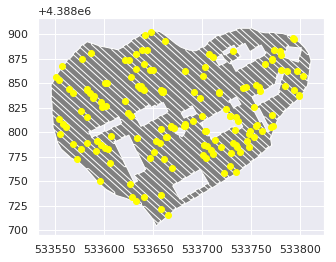

In [266]:
ax = transects.df.plot(ax=area.df.plot(color='gray'), color='gray')
# assemblage.df.plot(ax=ax, color='tomato')
artifacts_in_coverage.plot(ax=ax, color='yellow');

In [267]:
artifacts_in_coverage.head()

,layer_name,fid,time_penalty,ideal_obs_rate,geometry,index_right,su_id,area,base_search_time,length,sweep_width
0,ceramics,ceramics_1,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,POINT (533660.7973253919 4388772.7480053),6,6,680.151195,85.022987,170.045973,2
47,lithics,lithics_28,<scipy.stats._distn_infrastructure.rv_frozen o...,1,POINT (533582.6831036394 4388843.802865485),6,6,680.151195,85.022987,170.045973,2
48,lithics,lithics_29,<scipy.stats._distn_infrastructure.rv_frozen o...,1,POINT (533590.2578722327 4388837.243429136),6,6,680.151195,85.022987,170.045973,2
51,lithics,lithics_32,<scipy.stats._distn_infrastructure.rv_frozen o...,1,POINT (533588.3369371552 4388835.191357143),6,6,680.151195,85.022987,170.045973,2
78,lithics,lithics_63,<scipy.stats._distn_infrastructure.rv_frozen o...,1,POINT (533585.4834402539 4388840.106919997),6,6,680.151195,85.022987,170.045973,2


### Assign a `surface_visibility` to all `artifacts_in_coverage` from `Area` scalar or pull from distribution

In [268]:
if area.vis_type == 'distribution':
    # draw len(artifacts_in_coverage) samples from distribution
    pass
elif area.vis_type == 'scalar':
    # assign scalar value to all artifacts_in_coverage
    pass
elif area.vis_type == 'raster':
    # do complicated raster stuff
    pass
else:
    # raise error
    pass